<a href="https://colab.research.google.com/github/choijinhyuck/CoLabTest/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [2]:
x = iris.drop(columns='Class')

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(x)

print('고윳값 :', pca.singular_values_)
print('분산 설명력 :', pca.explained_variance_)

고윳값 : [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력 : [2.93808505 0.9201649  0.14774182 0.02085386]


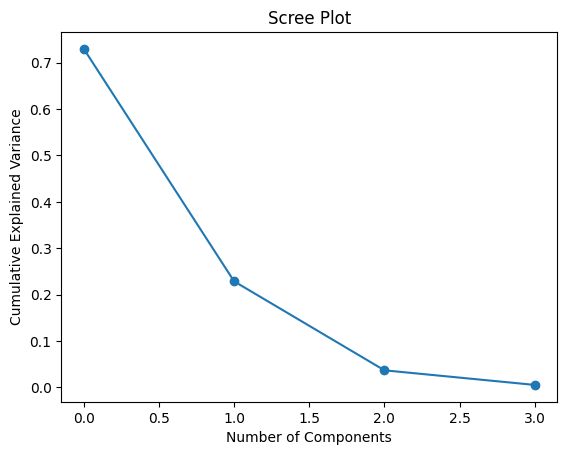

In [4]:
import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

In [5]:
# 주성분이 세 개일 때 급격히 기울기 감소가 발생하므로 두 개로 설정

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2'])
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


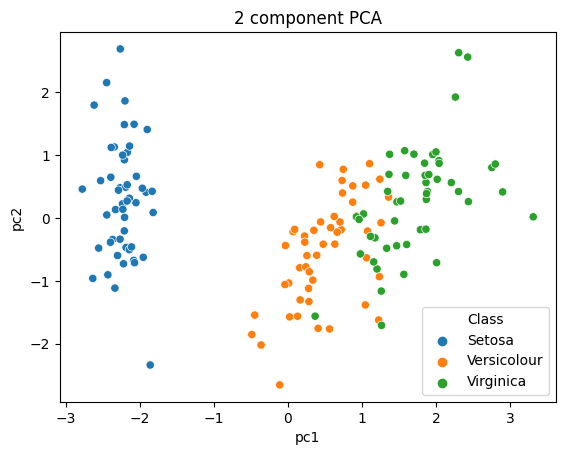

In [6]:
import seaborn as sns

plt.title('2 component PCA')
sns.scatterplot(x = 'pc1', y = 'pc2', hue = iris.Class, data = principal_iris)
plt.show()